In [51]:
from importlib import reload
import cupid_reader
reload(cupid_reader)
from cupid_reader import *

In [45]:
profiles = read_pickle('cleaned_profiles.p')[:]

#### Stem and remove punctuation (takes a while)

In [52]:
essay0 = essay(profiles, essay_num=0, frac_training=0.8)
essay0.stem_and_remove_punctuation(stemmer=SnowballStemmer("english") )

Removed punctuation, tokenized, and stemmed responses for essay  0
Time Elapsed: 198.34s


#### Covert prediction text labels to numeric, then split prediction set (gender in this case) into training and test subsets

In [47]:
# create numeric ids, training/test subsets for the prediction column
gender_prediction = prediction(profiles, 'sex', frac_training=0.8)
orientation_prediction = prediction(profiles, 'orientation', frac_training=0.8)


In [10]:
for i, id in enumerate(orientation_prediction.id_pairs):
    print(id)

(0, 'bisexual')
(2, 'straight')
(1, 'gay')


#### Split responses into training/test, convert to vector representation, apply TDFIF transform (weighting words) and fit to training data and then apply transform to data

In [53]:
# split into training and test sets
essay0.train_test_split(frac_training=0.8)

# vectorize, transform, use logistic regression and find best min_DF value
# save model and y scores for best min_df
essay0.fit_with_bestMinDF(gender_prediction, 'gender', ngram_max=1, minDF_range=np.linspace(5e-4, 5e-2, 15), maxDF=0.9)


Best min_df:  0.00403571428571
Time Elapsed: 97.42s


In [54]:
essay0.get_top_features('gender', gender_prediction, Ntop_features=15)

Top feature words for category:  gender
Top  15  feature words for  f  profiles:
heel ,  coef= -0.313819553225
sassi ,  coef= -0.303571928305
girl ,  coef= -0.30044154143
gal ,  coef= -0.281937092214
men ,  coef= -0.254415440881
chick ,  coef= -0.23207770918
love ,  coef= -0.20525957007
bake ,  coef= -0.165286971561
feminin ,  coef= -0.152084979883
queer ,  coef= -0.151837766265
yoga ,  coef= -0.151340043166
sweet ,  coef= -0.141890905999
independ ,  coef= -0.1404675646
craft ,  coef= -0.134319000367
ador ,  coef= -0.132112683613

Top  15  feature words for  m  profiles:
guy ,  coef= 0.376845659193
masculin ,  coef= 0.217611553894
women ,  coef= 0.204723954434
href ,  coef= 0.192230138236
dude ,  coef= 0.184732292363
dj ,  coef= 0.174061687449
father ,  coef= 0.162512732322
martial ,  coef= 0.14829364378
engin ,  coef= 0.147801136132
motorcycl ,  coef= 0.147070776032
softwar ,  coef= 0.144111558538
musician ,  coef= 0.14294271957
guitar ,  coef= 0.139251074668
construct ,  coef= 0.1373

In [36]:
mdl=essay0.retrieve_model('gender')
mdl.coef_

(1, 24417)

#### Plot ROC curve for the model

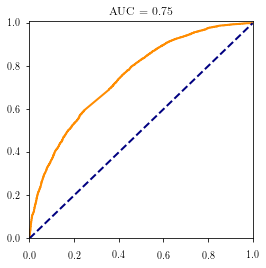

In [55]:
essay0.plotROC('gender', gender_prediction)


In [37]:
# don't fit for best minDF for multiclass orientation prediction--hard to classify when most are in one category (straight) and much less in others (gay/bi)?
essay0.train_test_split(frac_training=0.8)
vectorizer = essay0.vectorizer_init(ngram_max=3, min_df=0.0005, max_df=0.9)
essay0.transformer_init()
train_tfidf, test_tfidf = essay0.bagWords_and_transform(vectorizer, showTime=True)
mdl, yScore = essay0.logRegression(orientation_prediction, train_tfidf, test_tfidf)

In [26]:
essay0.add_prediction('orientation', mdl, vectorizer, train_tfidf, test_tfidf)
features_stem = vectorizer.get_feature_names()
zipped_coef_features = list( zip(mdl.coef_[cat_idx], features_stem),  )
zipped_coef_features.sort()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [39]:
mdl.coef_.shape[0]

3